## Instructions

We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
sys.path.append("..")
import time

Let's import neural_de

In [3]:
from neural_de.transformations.resolution_enhancer import ResolutionEnhancer

We load an example image

Text(0.5, 1.0, '(631, 640, 3)')

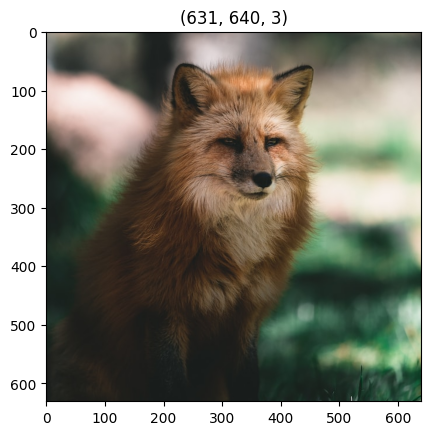

In [4]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
start=time.time()
input_path = Path('../examples/images/fox.jpg')
image = cv2.imread(str(input_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(image.shape)

## Enhancing an image

We create an instance of ResolutionShift :
- If you want to upsample multiple images and have a GPU, it is adviced to install torch with cuda enabled and use device='cuda', as upsampling can take a lot of time without.

In [7]:
shifter = ResolutionEnhancer(device='cpu') 

[03-19 17:14:09] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\utils\twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[03-19 17:14:09] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\transformations\resolution_enhancer.py:63} INFO - ResolutionEnhancer Initialized 


We apply the transform method to any number of images. 
- we can have multiple images per call of transform, and call transform multiple time with the same shifter.
- for now, only ratio=2 is available for upsampling, as the underlaying transformer was trained for a 2x resolution.

In [8]:
upsampled = shifter.transform([image], target_shape = (800, 800))

[03-19 17:14:11] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\transformations\resolution_enhancer.py:72} INFO - Swin2 model loaded to cpu


Text(0.5, 1.0, '(800, 800, 3)')

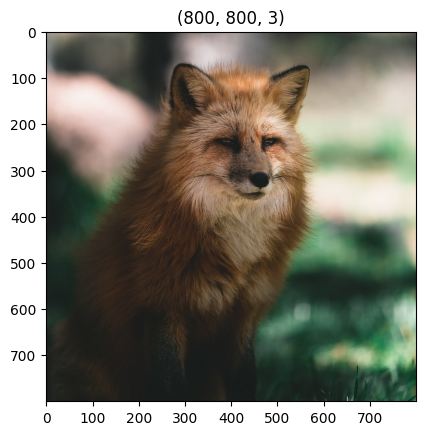

In [9]:
plt.imshow(upsampled[0])
plt.title(upsampled[0].shape)

## Improving image quality without changing the resolution

Using transform with output shape the same as the original image can still improve its quality.

In [10]:
improved = shifter.transform([image], target_shape=image.shape[:2])

Text(0.5, 1.0, '(631, 640, 3)')

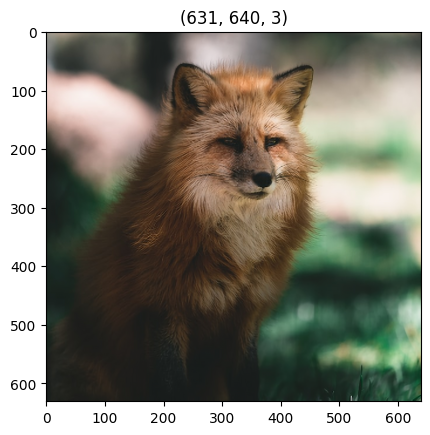

In [11]:
plt.imshow(improved[0])
plt.title(improved[0].shape)

# Working with batch
You can provide a batch of image to transform().
- All the images will be resized to target_shape.
- It supports images of different sizes as inputs.

In [12]:
another_image = image[100:300, 200:450]
improved_images = shifter.transform([image, another_image], target_shape=image.shape[:2])

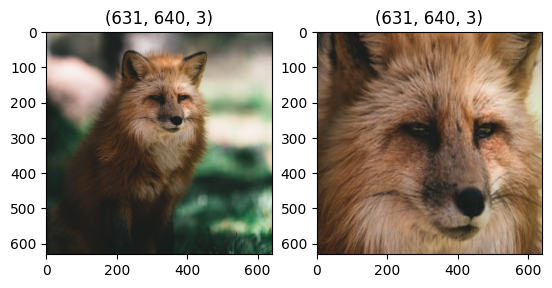

In [13]:
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(improved_images[i])
    plt.title(improved_images[i].shape)

# Include image with a crop ratio
ratio: foat value in range [0, 1[

[03-19 17:16:36] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\utils\twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


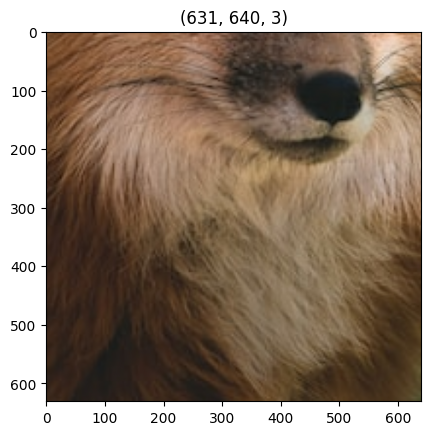

In [14]:
# crop input image by 70%
improved = shifter.transform([image], target_shape=image.shape[:2], crop_ratio=.7)

plt.imshow(improved[0])
plt.title(improved[0].shape);

In [15]:
end=time.time()
print("temps final : ",end-start)

temps final :  209.8618779182434
